In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ls

autoarimapred.jpeg          holidayDist.png            traintestsplit.jpeg
avgsalesperdept.png         myImagePDF.pdf             week.csv
avgsalesperstore.png        negative_weekly_sales.png  weekly1.csv
avg_sales_store.png         network.gv                 weekly2.csv
clean_data.csv              network.gv.pdf             weekly.csv
differenceofgraphs.jpeg     sampleSubmission.csv       weekly_merge.csv
differenttrends.jpeg        Scenario1.csv              weekly_merge.xlsx
effect_of_temp.png          stores.csv                 XGAct.pdf
exponentialsmsoothing.jpeg  test.csv                   XGPred.pdf
features.csv                times.csv
fetureImpLightGBM.pdf       train.csv


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Walmart

/content/gdrive/MyDrive/Colab Notebooks/Walmart


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("clean_data.csv")

In [ ]:
test_df=pd.read_csv("test.csv")

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df_new = df[['Date', 'Store', 'Dept', 'Weekly_Sales']]
df_new['Date'] = pd.to_datetime(df_new['Date'], format = '%Y-%m-%d')
df_new['Date'].freq = 'W-FRI'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_new

,Date,Store,Dept,Weekly_Sales
0,2010-02-05,1,1,24924.50
1,2010-02-05,1,2,50605.27
2,2010-02-05,1,3,13740.12
3,2010-02-05,1,4,39954.04
4,2010-02-05,1,5,32229.38
...,...,...,...,...
420207,2012-10-26,45,93,2487.80
420208,2012-10-26,45,94,5203.31
420209,2012-10-26,45,95,56017.47
420210,2012-10-26,45,97,6817.48


In [ ]:
import timeit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense,LSTM
from keras import layers

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()


In [ ]:
df_new['Store_Dept_code'] = df_new.apply(lambda x: str(x['Store']) + '-' + str(x['Dept']), axis = 1)
df_new.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Store,Dept,Weekly_Sales,Store_Dept_code
0,2010-02-05,1,1,24924.50,1-1
1,2010-02-05,1,2,50605.27,1-2


In [ ]:
df_piv = df_new.pivot_table(index = 'Date', columns = 'Store_Dept_code', values = 'Weekly_Sales')
df_piv =df_piv.fillna(0)
df_piv.head(2)

Store_Dept_code,1-1,1-10,1-11,1-12,1-13,1-14,1-16,1-17,1-18,1-19,...,9-9,9-90,9-91,9-92,9-93,9-94,9-95,9-96,9-97,9-98
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,30721.50,24213.18,8449.54,41969.29,19466.91,10217.55,13223.76,4729.5,1947.05,...,7245.32,2335.92,292.64,11620.09,0.0,0.0,23292.10,2438.08,668.48,0.0
2010-02-12,46039.49,31494.77,21760.75,8654.07,36476.40,18129.02,11873.89,13403.66,19006.5,1490.79,...,6556.94,2486.18,544.74,11080.50,0.0,982.5,22317.38,2304.09,766.93,0.0


In [ ]:
threshold_date = pd.to_datetime(df.Date.unique()[-test_df.Date.nunique()]).strftime('%Y-%m-%d')
threshold_date

'2012-02-03'

In [ ]:
train_lstm = df_piv[df_piv.index<threshold_date]
test_lstm = df_piv[df_piv.index>=threshold_date]

In [ ]:
minmax.fit(train_lstm)

MinMaxScaler()

In [ ]:
X_train = minmax.transform(train_lstm)
X_test = minmax.transform(test_lstm)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length  = 48
batch_size = 15 
generator = TimeseriesGenerator(X_train, X_train, length=length, batch_size=batch_size)

In [ ]:
test_index = df_piv[df_piv.index>=threshold_date].index
main_df = pd.DataFrame(index = test_index)

threshold_date = pd.to_datetime(df.Date.unique()[-test_df.Date.nunique()]).strftime('%Y-%m-%d')
threshold_date


'2012-02-03'

In [ ]:
sample_size = 150
whole_range = df_piv.shape[1]

samp = 0
end = sample_size
start = 0

In [ ]:
if (round(whole_range/sample_size)*sample_size)<whole_range:
    extra = 1
else:
    extra = 0

In [ ]:
samples = round(whole_range/sample_size)+extra

In [ ]:
def lstm(start,end):
    train_rnn = df_piv[df_piv.index<threshold_date].iloc[:,start:end]
    test_rnn = df_piv[df_piv.index>=threshold_date].iloc[:,start:end]
    minmax = MinMaxScaler()
    minmax.fit(train_rnn)
    X_train = minmax.transform(train_rnn)
    X_test = minmax.transform(test_rnn)
    length  = 48
    batch_size = 20 
    generator = TimeseriesGenerator(X_train, X_train, length=length, batch_size=batch_size) #Timesteps
    model = Sequential()
    model.add(LSTM(128,activation= 'tanh',return_sequences=True, input_shape=(length,X_train.shape[1])))
    model.add(LSTM(64, activation='tanh', return_sequences = False))
    model.add(Dense(X_train.shape[1]))
    model.compile(optimizer='adam', loss='mse')
    validation_generator = TimeseriesGenerator(X_test,X_test, length=38, batch_size=batch_size)
    model.fit(generator,epochs=160,
                        validation_data=validation_generator, verbose=2)
    n_features = X_train.shape[1]
    test_predictions = []
    first_eval_batch = X_train[:length]
    current_batch = first_eval_batch.reshape((1, length, n_features))

    for i in range(len(test_rnn)):
    
        current_pred = model.predict(current_batch)[0]
        test_predictions.append(current_pred)
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

    inv_test_pred = minmax.inverse_transform(test_predictions)
    pred_df = pd.DataFrame (data = inv_test_pred, columns =test_rnn.columns, index = test_rnn.index )
    return pred_df
    

In [ ]:
while samp<samples:
    
    print(f"Working on Sample: [{start}:{end}]")
    pred_df=lstm(start,end)
    samp = samp+1
    start= start+sample_size
    end = end+sample_size
    main_df = pd.merge(main_df,pred_df, right_index=True, left_index=True)

    print('Samples left:', samples- (samp) )

Streaming output truncated to the last 5000 lines.
3/3 - 0s - loss: 0.0114 - val_loss: 0.0288 - 82ms/epoch - 27ms/step
Epoch 77/160
3/3 - 0s - loss: 0.0113 - val_loss: 0.0287 - 78ms/epoch - 26ms/step
Epoch 78/160
3/3 - 0s - loss: 0.0112 - val_loss: 0.0279 - 81ms/epoch - 27ms/step
Epoch 79/160
3/3 - 0s - loss: 0.0111 - val_loss: 0.0284 - 82ms/epoch - 27ms/step
Epoch 80/160
3/3 - 0s - loss: 0.0110 - val_loss: 0.0291 - 81ms/epoch - 27ms/step
Epoch 81/160
3/3 - 0s - loss: 0.0109 - val_loss: 0.0286 - 82ms/epoch - 27ms/step
Epoch 82/160
3/3 - 0s - loss: 0.0108 - val_loss: 0.0281 - 78ms/epoch - 26ms/step
Epoch 83/160
3/3 - 0s - loss: 0.0107 - val_loss: 0.0288 - 91ms/epoch - 30ms/step
Epoch 84/160
3/3 - 0s - loss: 0.0106 - val_loss: 0.0291 - 84ms/epoch - 28ms/step
Epoch 85/160
3/3 - 0s - loss: 0.0105 - val_loss: 0.0284 - 85ms/epoch - 28ms/step
Epoch 86/160
3/3 - 0s - loss: 0.0104 - val_loss: 0.0292 - 83ms/epoch - 28ms/step
Epoch 87/160
3/3 - 0s - loss: 0.0103 - val_loss: 0.0291 - 89ms/epoch - 

In [ ]:
rnn_pred_trans = main_df.stack().reset_index()
rnn_pred_trans.columns = ['Date', 'Store_Dept_code', 'Weekly_Sales_Rnn']
df_with_pred = pd.merge(df_new,rnn_pred_trans, right_on = ['Date', 'Store_Dept_code'], left_on=['Date', 'Store_Dept_code'], how = 'left')

In [ ]:
from sklearn import metrics
from sklearn.metrics import  r2_score
actual = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()].Weekly_Sales
predicted = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()].Weekly_Sales_Rnn




print(round(np.sqrt(metrics.mean_squared_error(actual, predicted))))


5006


In [ ]:
df_temp = df_with_pred[~df_with_pred.Weekly_Sales_Rnn.isnull()]
df_temp =df_temp[(df_temp.Store ==1)&(df_temp.Dept == 1)]
df_temp.set_index('Date', inplace = True)

In [ ]:
df_temp.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Store_Dept_code', 'Weekly_Sales_Rnn'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt


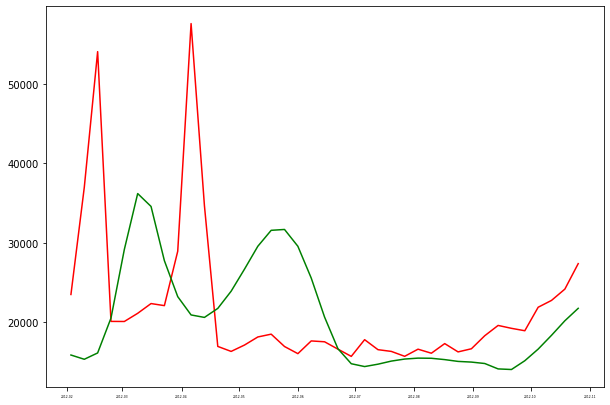

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(df_temp['Weekly_Sales'], color = 'r')
plt.plot(df_temp['Weekly_Sales_Rnn'], color = 'g')
plt.tick_params(axis='x', which='major', labelsize = 3)
plt.savefig('LSTM_approach2.png')
plt.show()
